In [1]:
import sys, os

# ノートブックからプロジェクトのルートを取得
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

# 関数をインポート
from scripts.QGIS.run_main import run_dlite_algorithm

# 実行
result = run_dlite_algorithm()

📏 距離: 1045.34 m
🛣️ ノード数: 13


/Users/segawamizuto/QGIS_Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_32353/1352983180.py:46: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_32353/1352983180.py:46: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_32353/1352983180.py:46: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5k/v8xmd75s653ctdg7lhgqr7kw0000gn/T/ipykernel_32353/1352983180.py:46: UserWarning: Glyph 26223 (\N{CJK UNIFIED IDEOGR

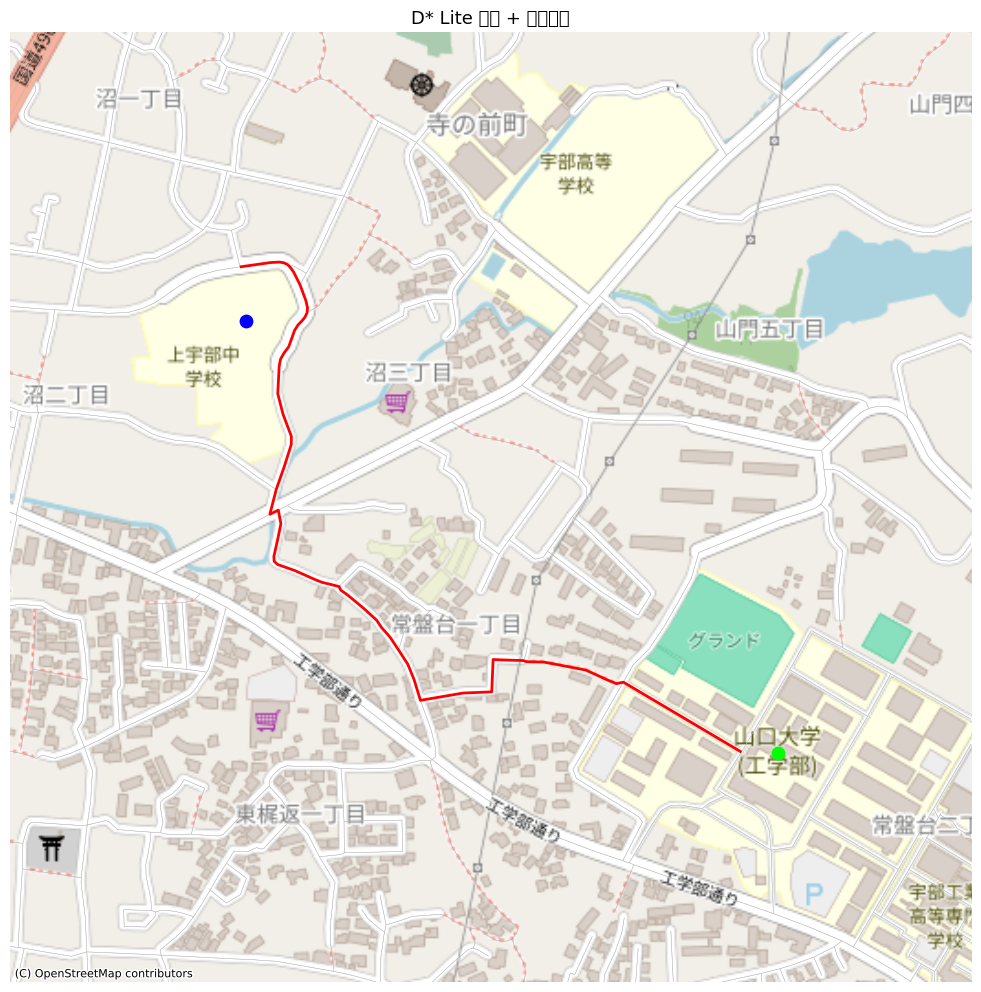

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx 
from shapely.geometry import LineString, Point

# --- 経路をGeoDataFrame化（元は緯度経度座標） ---
route_line = LineString(result["route_coords"])
start_pt = Point(result["start"].x, result["start"].y)
goal_pt = Point(result["goal"].x, result["goal"].y)

# --- 背景の道路データ ---
roads = gpd.read_file("/Users/segawamizuto/QGIS_Project/data/processed/roads/ube_roads.shp")

# --- データのCRS確認（なければ設定） ---
if roads.crs is None:
    roads = roads.set_crs(epsg=4326)  # 例：WGS84緯度経度

# --- 背景地図と整合させるため、すべてをEPSG:3857（Web Mercator）に変換 ---
roads_view = roads.to_crs(epsg=3857)
route_view = gpd.GeoDataFrame(geometry=[route_line], crs=roads.crs).to_crs(epsg=3857)
start_view = gpd.GeoDataFrame(geometry=[start_pt], crs=roads.crs).to_crs(epsg=3857)
goal_view = gpd.GeoDataFrame(geometry=[goal_pt], crs=roads.crs).to_crs(epsg=3857)

# --- プロット ---
fig, ax = plt.subplots(figsize=(10, 10))
roads_view.plot(ax=ax, color="#bbbbbb", linewidth=0.3)
route_view.plot(ax=ax, color="red", linewidth=2)
start_view.plot(ax=ax, color="lime", markersize=80)
goal_view.plot(ax=ax, color="blue", markersize=80)

# --- 経路周辺だけを拡大 ---
minx, miny, maxx, maxy = route_view.total_bounds
margin = 300  # メートル単位（Web Mercator）
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)

# --- 背景地図を追加（OpenStreetMap） ---
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=roads_view.crs
)

plt.title("D* Lite 経路 + 背景地図", fontsize=13)
ax.set_axis_off()
plt.tight_layout()
plt.show()